# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



In [59]:
#definimos la dunicon
def L(phi, k):
  return np.sqrt(1 - k * np.sin(phi)**2)

b = 1
av = np.linspace(1, 100, 100)  # Valores de 'a' entre 1 y 100
L_values = []
e=[]


#evaliamos la integral
for a in av :
    k = (a**2 - b**2) / a**2
    valor, _ = quad(L, 0, np.pi/2, args=(np.sqrt(k,)))
    L_values.append(4 * a * valor)
    e.append(np.sqrt(k))


# def Int(a,b,phi):
#   k = (a**2 - b**2) / (a**2)
#   e =  np.sqrt(k)
#   #calculo de la integral
#   k_i, error_k = quad(L, 0, np.pi/2, args=(k,))

#   Lk= 4*a * k_i
#   return Lk,e




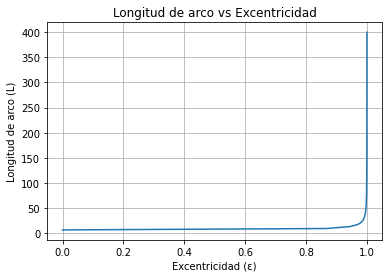

In [60]:

plt.plot(e, L_values)
plt.xlabel('Excentricidad (ε)')
plt.ylabel('Longitud de arco (L)')
plt.title('Longitud de arco vs Excentricidad')
plt.grid(True)
plt.show()


In [67]:

# Calcular las derivadas dx/dt y dy/dt
dx_dt = np.zeros(num_points)
dy_dt = np.zeros(num_points)

for i in range(1, num_points):
    dx_dt[i] = (x[i] - x[i-1]) / dt
    dy_dt[i] = (y[i] - y[i-1]) / dt

# Calcular la longitud de arco utilizando la integral numérica
L = 0

for i in range(1, num_points):
    integrand = np.sqrt(dx_dt[i]**2 + dy_dt[i]**2)
    L += integrand * dt


print("Longitud de arco:", L)


Longitud de arco: 9.499096997356329



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [61]:
teta= np.deg2rad(45)

v1= np.array([np.cos(teta),-np.sin(teta)]) 
v2= np.array([np.sin(teta),np.cos(teta)])
A = np.array([v1,v2])


In [62]:
#Polinomio caracteristico

pc = np.poly(A)
print('Polinomio caracteristico de A es =',pc)

Polinomio caracteristico de A es = [ 1.         -1.41421356  1.        ]


In [63]:
#calculo de autovalores y vectores propios
av,vc=np.linalg.eigh(A)

print('Los autovaores de A son=',av)
print('Los Vectories propios de A son=',vc)

Los autovaores de A son= [1.11022302e-16 1.41421356e+00]
Los Vectories propios de A son= [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [64]:
# Matriz diagonal
p= np.transpose(vc)
p_=np.linalg.inv(p)

D=p_@A@p
print('Matriz diagonal:',D)


Matriz diagonal: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
